In [1]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
os.chdir("../../scripts")
from clustering_operations import *

%load_ext autoreload
%autoreload 2

In [3]:
file = "../data/shapefiles/FAPAN_level_06/FAPAN_level_06_inclusive.shp"    

# open file
shp = gpd.read_file(file)
df = pd.read_csv("../data/FAPAN_level_06.csv")

In [4]:
df

,HYBAS_ID,SUBIDs,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,2060000010,9000340.0,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2060000020,"9713800.0,9714060.0,9713811.0,9000340.0,900034...",-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2060000030,"9714184.0,9714057.0,9714060.0,9713809.0,971381...",-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2060000240,"9714184.0,9705993.0,9750034.0,9750038.0,975004...",-0.730333,0.179333,-0.258333,-0.735667,-0.692333,-0.692333,-0.807667,-0.869000,...,0.519000,-0.272333,-0.565667,0.998000,1.364667,0.942000,1.723667,0.914667,0.618000,0.479000
4,2060000250,"9749765.0,9000255.0,9750185.0,9750124.0,974983...",-0.614290,-0.060916,-0.248174,-0.452101,0.300339,0.365251,0.210222,-0.174209,...,0.773108,-0.584944,-0.921383,0.464545,0.500429,0.367784,0.946885,0.401800,0.514194,0.856134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2060092010,"9715271.0,9715561.0,9715378.0,9621913.0,962188...",-1.266984,-0.402407,0.246860,-0.968145,-0.889234,-0.976834,-0.282428,0.005213,...,1.196343,2.081929,2.179278,1.467632,1.385749,1.552513,1.542264,0.633726,0.343541,0.027508
1137,2060092270,"9611011.0,9613316.0,9611751.0,9611144.0,960004...",NaN,-0.426679,-0.742938,-1.043034,-0.153266,0.358655,0.742224,0.404773,...,1.162815,2.146831,1.421175,0.397978,0.230910,0.246707,0.212096,-0.223821,-0.091519,-0.066685
1138,2060094250,"9613251.0,9611780.0,9613285.0,9621412.0,961332...",NaN,-0.021003,-0.632027,-0.614189,0.204217,-0.070974,-0.368166,-0.578827,...,2.036412,1.856630,1.045659,0.977311,1.715401,2.171822,1.829746,1.527238,0.846560,0.997440
1139,2060099470,"9715425.0,9621857.0,9714987.0,9715442.0,971557...",-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820


In [5]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(140, 16)

In [6]:
df = df.drop("SUBIDs", axis=1)
df = df.rename(columns={"HYBAS_ID" : "SUBID"})
shp = shp.rename(columns={"HYBAS_ID" : "SUBID"})
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2060000010,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2060000020,-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,-1.246925,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2060000030,-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,-1.442330,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2060000240,-0.730333,0.179333,-0.258333,-0.735667,-0.692333,-0.692333,-0.807667,-0.869000,-1.366000,...,0.519000,-0.272333,-0.565667,0.998000,1.364667,0.942000,1.723667,0.914667,0.618000,0.479000
4,2060000250,-0.614290,-0.060916,-0.248174,-0.452101,0.300339,0.365251,0.210222,-0.174209,-0.475216,...,0.773108,-0.584944,-0.921383,0.464545,0.500429,0.367784,0.946885,0.401800,0.514194,0.856134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2060092010,-1.266984,-0.402407,0.246860,-0.968145,-0.889234,-0.976834,-0.282428,0.005213,0.506018,...,1.196343,2.081929,2.179278,1.467632,1.385749,1.552513,1.542264,0.633726,0.343541,0.027508
1137,2060092270,NaN,-0.426679,-0.742938,-1.043034,-0.153266,0.358655,0.742224,0.404773,0.401854,...,1.162815,2.146831,1.421175,0.397978,0.230910,0.246707,0.212096,-0.223821,-0.091519,-0.066685
1138,2060094250,NaN,-0.021003,-0.632027,-0.614189,0.204217,-0.070974,-0.368166,-0.578827,-0.350964,...,2.036412,1.856630,1.045659,0.977311,1.715401,2.171822,1.829746,1.527238,0.846560,0.997440
1139,2060099470,-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,0.268928,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820


<AxesSubplot:>

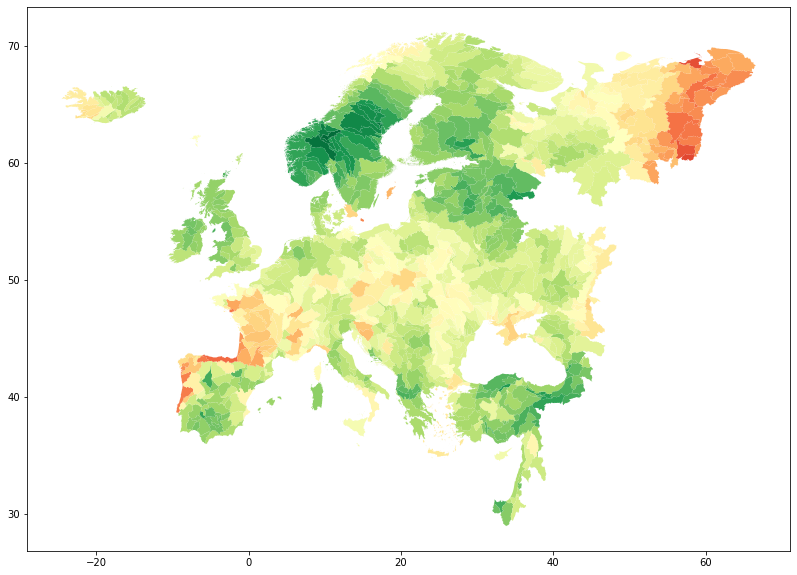

In [7]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn')

In [8]:
# Calculate centroids
shp['centroid'] = shp['geometry'].centroid

# Extract latitude and longitude
shp['LATITUDE'] = shp['centroid'].apply(lambda centroid: centroid.y)
shp['LONGITUDE'] = shp['centroid'].apply(lambda centroid: centroid.x)

# Drop the 'centroid' column if needed
shp = shp.drop('centroid', axis=1)

/var/folders/6b/j2xt7shx2fq5nt2p9y46s3lh0000gn/T/ipykernel_39661/1722491891.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['centroid'] = shp['geometry'].centroid


In [9]:
df.insert(1, 'x', shp['LONGITUDE'])
#df['x'] = df['x'].astype(float)
df.insert(2, 'y', shp['LATITUDE'])
#df['y'] = df['y'].astype(float)

In [10]:
df.shape

(1141, 207)

In [11]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [12]:
df = select_columns_by_months(df, [5,6,7,8,9])
df.shape

(1141, 88)

In [13]:
df_noNA = df.dropna()
df_noNA = df_noNA.reset_index(drop=True)
df_noNA.shape

(1108, 88)

In [14]:
shp_noNA = shp[shp['SUBID'].isin(df_noNA['SUBID'])]
shp_noNA = shp_noNA.reset_index(drop=True)
shp_noNA.shape

(1108, 18)

In [15]:
df_noNA

,SUBID,x,y,5,6,7,8,9,17,18,...,185,186,187,188,189,197,198,199,200,201
0,2060000010,32.296479,31.271897,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,-1.364220,-1.472670,...,1.672222,1.800685,1.506063,1.320623,1.237319,0.853791,1.173939,1.140341,1.228164,1.138968
1,2060000020,32.510856,30.455109,-1.276926,-1.180634,-1.538944,-1.531854,-1.246925,-1.079911,-1.456640,...,0.943147,0.862629,0.306773,0.101583,-0.271849,0.599397,1.216978,0.375715,-0.147517,-0.201637
2,2060000030,33.063032,30.808122,-1.410301,-1.400624,-1.571780,-1.620268,-1.442330,-1.276214,-1.517508,...,1.661565,1.578136,1.314323,1.174539,1.043911,0.879883,1.515541,1.158499,0.869266,0.876306
3,2060000240,33.927702,30.097298,-0.692333,-0.692333,-0.807667,-0.869000,-1.366000,-0.207000,-0.914667,...,1.114000,2.348000,1.746667,1.818667,1.966000,-0.565667,0.998000,1.364667,0.942000,1.723667
4,2060000250,34.240206,31.148776,0.300339,0.365251,0.210222,-0.174209,-0.475216,0.547446,0.091459,...,0.875571,1.293950,1.016018,1.070481,1.311569,-0.921383,0.464545,0.500429,0.367784,0.946885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,2060092010,31.548196,37.355199,-0.889234,-0.976834,-0.282428,0.005213,0.506018,-0.871532,-0.470470,...,0.038283,0.906006,1.395840,1.641538,1.665542,2.179278,1.467632,1.385749,1.552513,1.542264
1104,2060092270,32.864366,39.234376,-0.153266,0.358655,0.742224,0.404773,0.401854,0.038775,0.234265,...,-0.775757,0.448390,1.092893,0.443783,0.134176,1.421175,0.397978,0.230910,0.246707,0.212096
1105,2060094250,33.446479,37.919047,0.204217,-0.070974,-0.368166,-0.578827,-0.350964,-0.002244,0.242624,...,0.123596,1.305351,1.566676,1.565387,1.358509,1.045659,0.977311,1.715401,2.171822,1.829746
1106,2060099470,32.032950,37.074366,-0.838684,-0.836202,-0.209959,0.100777,0.268928,-0.784462,-0.496746,...,-0.342760,0.742466,1.196438,1.300537,1.449411,2.341377,1.601097,1.100800,1.080092,1.160548


## Compute neighbours

In [16]:
# add neighbours column
shp_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp_noNA[~shp_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp_noNA.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

  0%|          | 3/1108 [00:00<00:49, 22.37it/s]

100%|█████████▉| 1103/1108 [01:08<00:00, 16.18it/s]

In [62]:
shp_sep = shp_august_noNA.copy()

In [563]:
shp_sep['NEIGHBOURS'] = shp_august_noNA['NEIGHBOURS'].apply(lambda x: ', '.join(map(str, x)) if x else '')  # Convert elements to string

In [564]:
shp_sep.to_file("../data/shapefiles/FAPAN_neighbours/august_noNA_dropped3/august_noNA_dropped3_droppedduplicate.shp")

In [17]:
# Create a set to store unique pairs
unique_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        unique_pairs.add(pair)

In [18]:
neighbours = []
progress_bar = tqdm(total=len(unique_pairs), position=0, leave=True, smoothing=0)

for couple in unique_pairs:
    subid_x_y = [f"{df_noNA.loc[df_noNA['SUBID'] == subid, 'x'].values[0]}_{df_noNA.loc[df_noNA['SUBID'] == subid, 'y'].values[0]}" for subid in couple]
    neighbours.append(tuple(subid_x_y))
    
    progress_bar.update(1)

100%|██████████| 1108/1108 [01:08<00:00, 16.11it/s]


100%|█████████▉| 2884/2894 [00:17<00:00, 168.62it/s]

In [19]:
df_without_neighbours = shp_noNA[shp_noNA["NEIGHBOURS"].apply(len)==0][["LATITUDE", "LONGITUDE"]]
without_neighbours = ['{}_{}'.format(row['LONGITUDE'], row['LATITUDE']) for index, row in df_without_neighbours.iterrows()]

## Compute and visualize clusterings

In [20]:
df = df_noNA.copy()

transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[1, i]) + '_' + str(transposed_df.iloc[2, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1, 2], inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
df = df.astype(float)

In [22]:
df.head()

,32.296478798287545_31.27189666211486,32.510855866130946_30.45510876556893,33.06303203853544_30.808121855442963,33.927701730531616_30.097297652683793,34.24020640768035_31.14877584408459,34.784029242235405_31.209245849757856,35.55253354166544_33.56197068852566,36.643053915443566_35.40085416038317,36.14962977322427_36.571555633441534,35.92855047729356_36.873856888254416,...,30.17819726105111_37.71678874502663,35.21959615963677_38.28861402102067,21.022148007365395_40.91609798923129,18.49508745708962_42.84841122228151,33.75934632721296_37.835943186536575,31.54819552953363_37.35519859306083,32.864366027697194_39.23437602091948,33.44647882163208_37.919046887330445,32.03295006777807_37.07436560514042,3.199073295906771_44.322404911439584
0,-1.449651,-1.276926,-1.410301,-0.692333,0.300339,0.528451,0.770503,0.218928,0.413368,0.506402,...,-0.755817,-0.235690,-1.123335,0.242447,0.096957,-0.889234,-0.153266,0.204217,-0.838684,-0.173271
1,-1.545862,-1.180634,-1.400624,-0.692333,0.365251,0.688560,0.785808,0.211683,0.231003,-0.390378,...,-0.587290,-0.105428,-0.520136,0.162447,-0.127308,-0.976834,0.358655,-0.070974,-0.836202,0.445322
2,-1.579616,-1.538944,-1.571780,-0.807667,0.210222,0.603497,0.396366,0.023097,-0.016715,-0.501666,...,-0.444541,0.006444,-0.606204,-0.603288,-0.369229,-0.282428,0.742224,-0.368166,-0.209959,0.454190
3,-1.687005,-1.531854,-1.620268,-0.869000,-0.174209,0.098456,0.038589,-0.001214,0.418202,0.244774,...,-0.430273,0.180255,-0.847730,0.006737,-0.571327,0.005213,0.404773,-0.578827,0.100777,-0.393404
4,-1.750921,-1.246925,-1.442330,-1.366000,-0.475216,0.105917,0.100444,0.040590,0.392802,0.529058,...,-0.045484,0.356777,-0.923210,0.674859,-0.446566,0.506018,0.401854,-0.350964,0.268928,0.600451


df['13.9024_58.1193'] CONTIENE IL DUPLICATO

In [23]:
#df = df.loc[:,~df.columns.duplicated()]

In [23]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()
    #shp = shp.drop("ClusterID", axis=1)
    #shp["CLUSTERID"] = 0  

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    clusterid = 0
    for cluster in clusters:
        for coordinate in cluster:
            coordinate = coordinate.split('_')
            shp.loc[((shp['LONGITUDE'] == float(coordinate[0])) & (shp['LATITUDE'] == float(coordinate[1]))), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    seed_value = 45
    np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [25]:
clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.8)

Computing neighbours strengths...


  0%|          | 0/2894 [00:00<?, ?it/s]

100%|██████████| 2894/2894 [00:01<00:00, 2139.73it/s]


Neighbours strengths computed.
Computing clusters...


1215it [00:26, 46.01it/s]                         s]

Clusters computed.


No. clusters (w/o singletons) = 101
No. singletons = 42


100%|██████████| 1108/1108 [00:05<00:00, 207.74it/s]


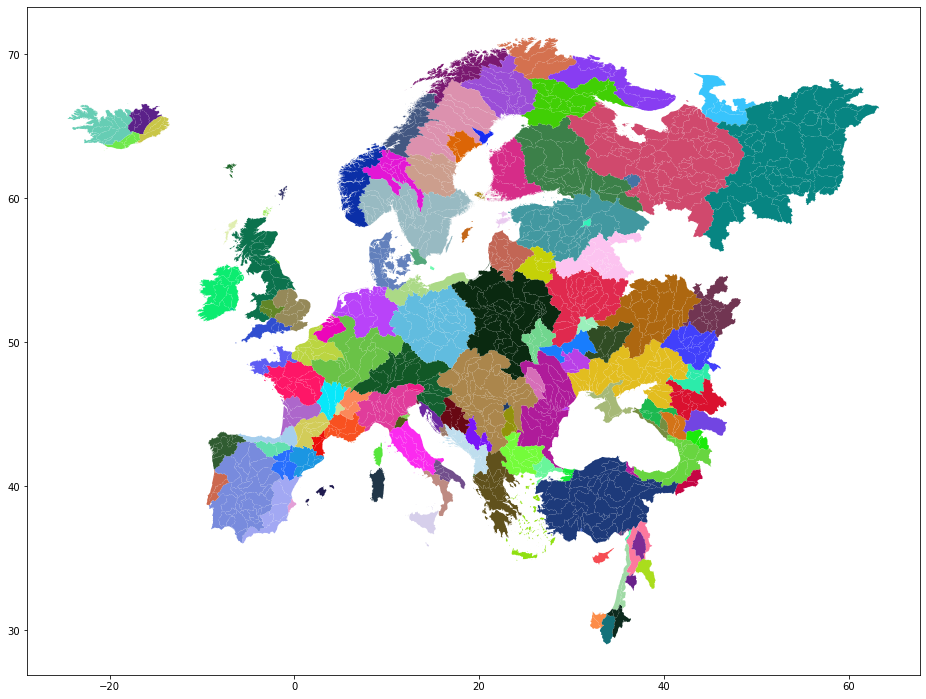

In [26]:
plot_clusters_shp(shp_noNA, clusters_corr08, figsize=(16,16))

In [27]:
clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.85)

Computing neighbours strengths...


100%|██████████| 2894/2894 [00:00<00:00, 4697.78it/s]


Neighbours strengths computed.
Computing clusters...


1369it [00:17, 79.62it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 166
No. singletons = 80


100%|██████████| 1108/1108 [00:02<00:00, 379.36it/s] 


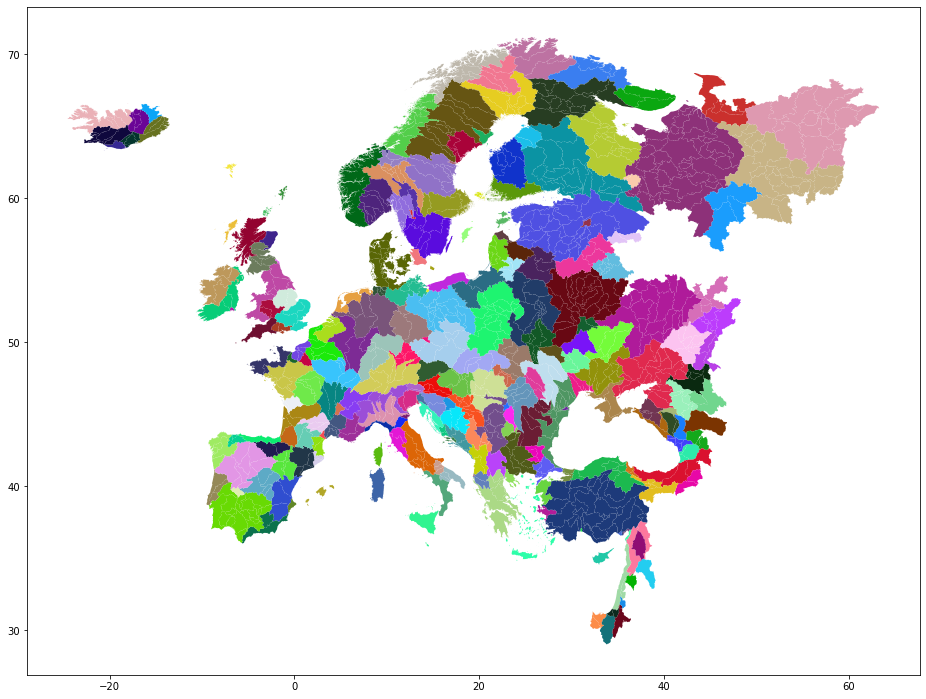

In [28]:
plot_clusters_shp(shp_noNA, clusters_corr085, figsize=(16,16))

In [29]:
clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 2894/2894 [00:00<00:00, 5290.05it/s]


Neighbours strengths computed.
Computing clusters...


1711it [00:12, 138.11it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 226
No. singletons = 218


100%|██████████| 1108/1108 [00:02<00:00, 406.13it/s] 


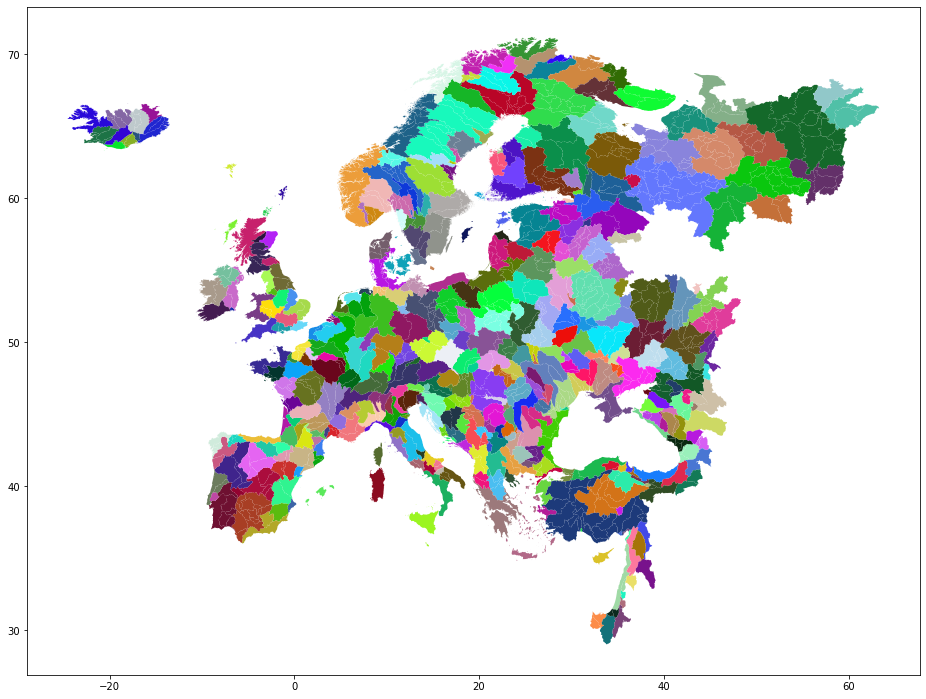

In [30]:
plot_clusters_shp(shp_noNA, clusters_corr09, figsize=(16,16))

In [25]:
complete_clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.8)

Computing neighbours strengths...


 19%|█▉        | 544/2894 [00:00<00:01, 2001.33it/s]

100%|██████████| 2894/2894 [00:02<00:00, 1345.67it/s]


Neighbours strengths computed.
Computing clusters...


1565it [01:38, 15.83it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 292
No. singletons = 67


100%|██████████| 1108/1108 [00:12<00:00, 91.15it/s] 


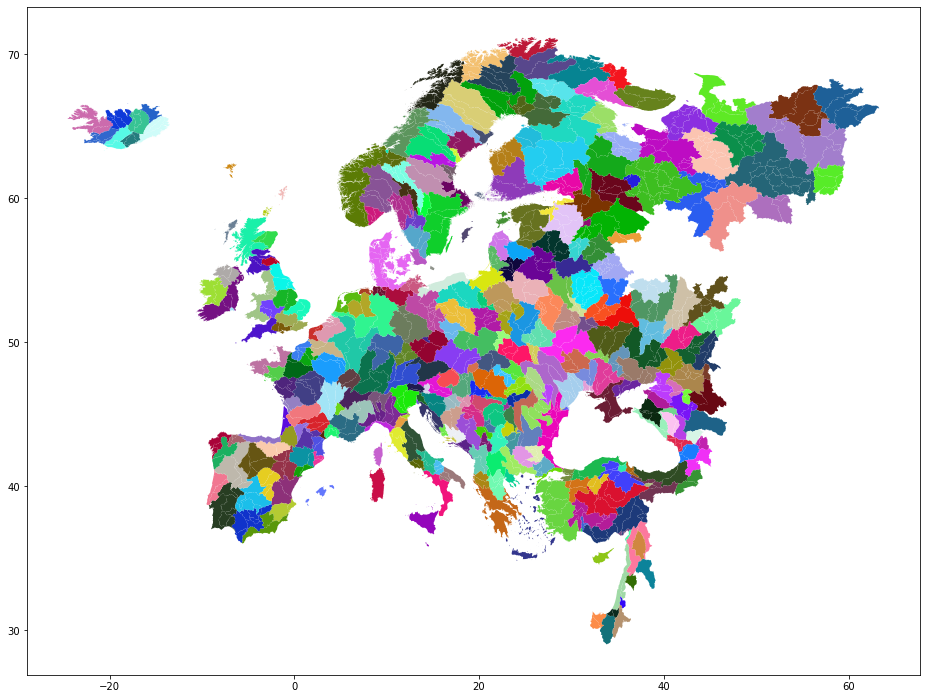

In [26]:
plot_clusters_shp(shp_noNA, complete_clusters_corr08, figsize=(16,16))

In [27]:
complete_clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.85)

Computing neighbours strengths...


100%|██████████| 2894/2894 [00:02<00:00, 1073.56it/s]


Neighbours strengths computed.
Computing clusters...


1725it [01:43, 16.59it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 333
No. singletons = 120


100%|██████████| 1108/1108 [00:12<00:00, 86.25it/s] 


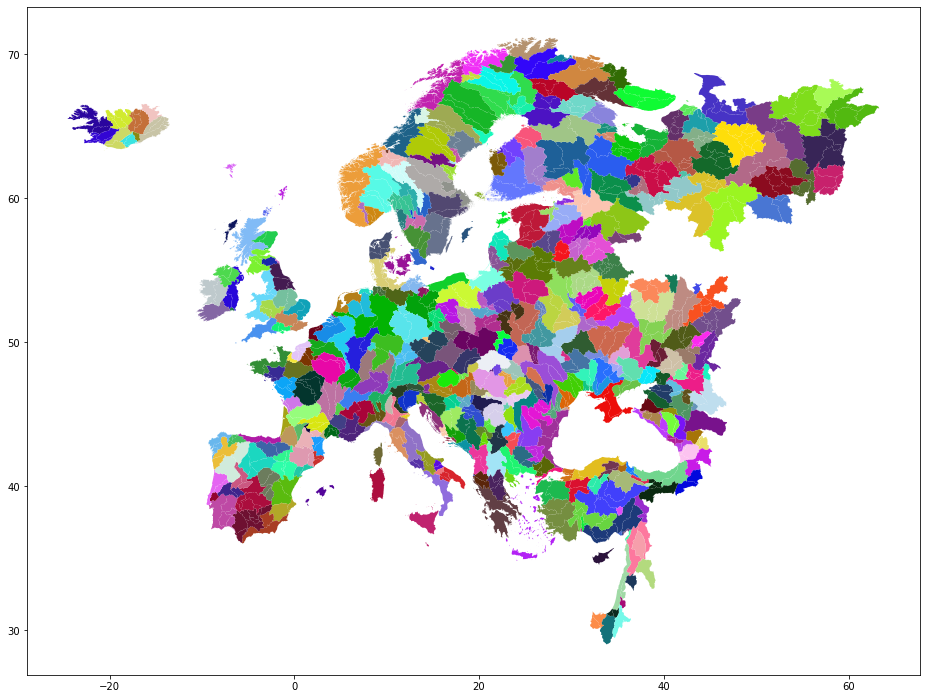

In [28]:
plot_clusters_shp(shp_noNA, complete_clusters_corr085, figsize=(16,16))

In [29]:
complete_clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 2894/2894 [00:02<00:00, 1435.98it/s]


Neighbours strengths computed.
Computing clusters...


2000it [00:42, 47.06it/s]                         

Clusters computed.


No. clusters (w/o singletons) = 344
No. singletons = 268


100%|██████████| 1108/1108 [00:13<00:00, 80.62it/s] 


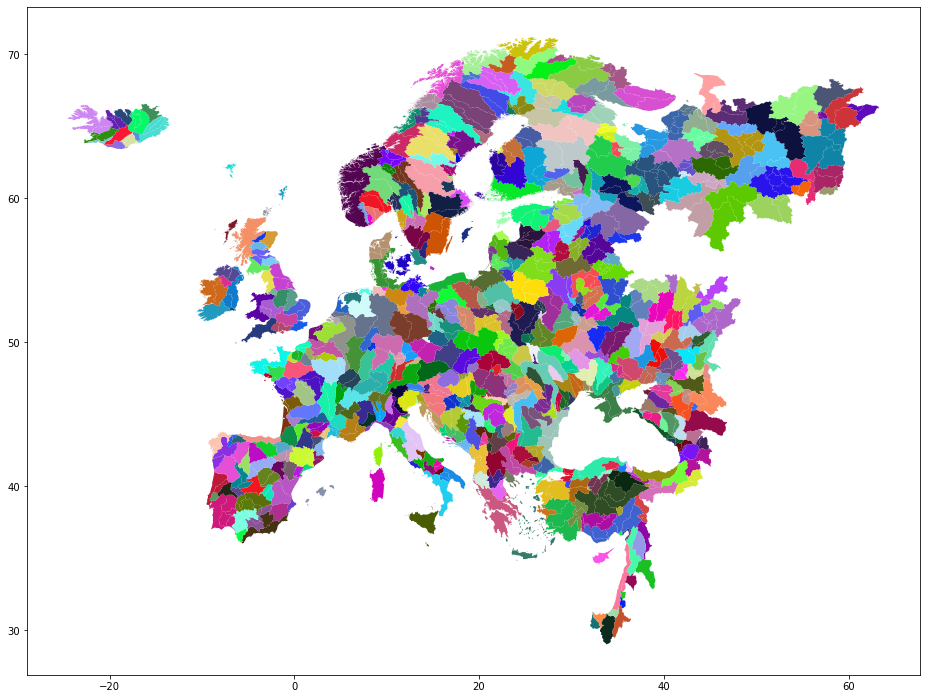

In [30]:
plot_clusters_shp(shp_noNA, complete_clusters_corr09, figsize=(16,16))